In [89]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Convolution = Intutively

In [90]:
url = 'https://source.unsplash.com/U66avewmxJk/400x300'

In [91]:
cheetah = imageio.imread(url)

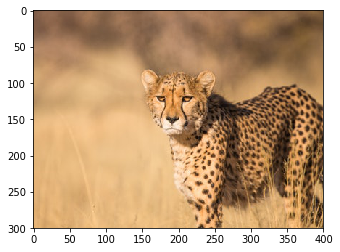

In [92]:
plt.imshow(cheetah)
plt.show()

In [93]:
cheetah.shape    # 300x400 pixel and 3 layers

(300, 400, 3)

In [94]:
import skimage

In [95]:
image_gray = skimage.color.rgb2gray(cheetah)

In [96]:
image_gray.shape

(300, 400)

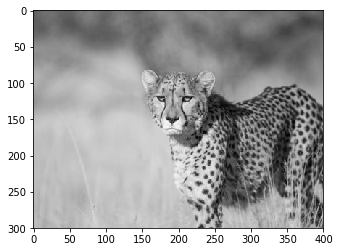

In [97]:
plt.imshow(image_gray, cmap= 'gray')
plt.show()

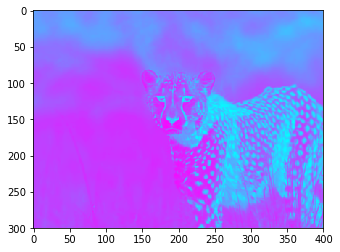

In [98]:
plt.imshow(image_gray, cmap= 'cool')
plt.show()

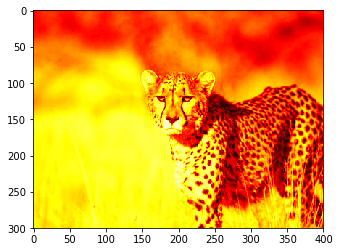

In [99]:
plt.imshow(image_gray, cmap= 'hot')
plt.show()

In [100]:
image = image_gray.reshape(300,400,1)

In [101]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation

In [102]:
filters=1
kernel_size=(2,2)

In [103]:
model=Sequential()
model.add(Conv2D(filters, kernel_size, input_shape=(300,400,1)))

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 299, 399, 1)       5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [105]:
def convolution(image, model):
    print ('Original Shape: ', image.shape)
    image = image/255
    image_batch = np.array([image])
    conv_image = model.predict (image_batch)
    conv_image = conv_image.squeeze()
    print('New Shape: ', conv_image.shape)
    plt.imshow(conv_image, cmap ="gray")   
#  these are color that you can replace in the quotes { Colormap heat is not recognized. Possible values are: Accent, Accent_r, 
#Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, 
#Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
#PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu,
#RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, 
#Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, 
#binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, 
#copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, 
#gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, 
#gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, 
#nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, 
#spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
#twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r}

Original Shape:  (300, 400, 1)
New Shape:  (299, 399)


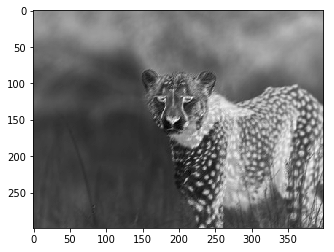

In [106]:
convolution(image, model)

In [107]:
model.layers[0].get_weights()

[array([[[[ 0.11224109]],
 
         [[-0.85924906]]],
 
 
        [[[-0.7552931 ]],
 
         [[ 0.4441275 ]]]], dtype=float32), array([0.], dtype=float32)]

# Conv + Activation

In [108]:
model2 = Sequential()
model2.add(Conv2D(1,(3,3), input_shape=(300,400,1)))
model2.add(Activation("relu"))

Original Shape:  (300, 400, 1)
New Shape:  (298, 398)


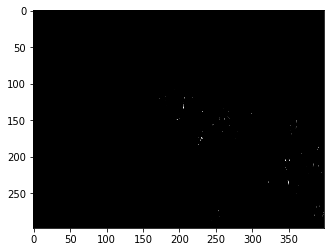

In [109]:
convolution(image, model2)

# Conv + Pooling

In [110]:
model3 = Sequential()
model3.add(Conv2D(1,(8,8), input_shape=(300,400,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))

Original Shape:  (300, 400, 1)
New Shape:  (146, 196)


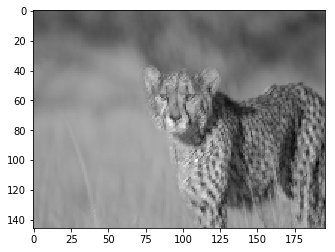

In [111]:
convolution(image, model3)

# Conv + Activation + Pooling

In [129]:
model4 = Sequential()
model4.add(Conv2D(1,(), input_shape=(300,400,1)))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))

Original Shape:  (300, 400, 1)
New Shape:  (148, 198)


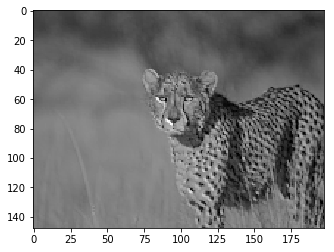

In [130]:
convolution(image, model4)